# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import  pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('craftcans.csv', na_values=[])
df.head(1)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50


## How many rows do you have in the data? What are the column types?

In [3]:
df.head

<bound method NDFrame.head of                           Beer              Brewery         Location  \
0                 Get Together    NorthGate Brewing  Minneapolis, MN   
1                Maggie's Leap    NorthGate Brewing  Minneapolis, MN   
2                   Wall's End    NorthGate Brewing  Minneapolis, MN   
3                      Pumpion    NorthGate Brewing  Minneapolis, MN   
4                   Stronghold    NorthGate Brewing  Minneapolis, MN   
...                        ...                  ...              ...   
2411  Mama's Little Yella Pils  Oskar Blues Brewery     Longmont, CO   
2412        GUBNA Imperial IPA  Oskar Blues Brewery     Longmont, CO   
2413                  Old Chub  Oskar Blues Brewery     Longmont, CO   
2414         Gordon Ale (2009)  Oskar Blues Brewery     Longmont, CO   
2415           Dale's Pale Ale  Oskar Blues Brewery     Longmont, CO   

                               Style    Size    ABV IBUs  
0                       American IPA  16 oz.  

In [4]:
df.shape

(2416, 7)

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
df.groupby('Brewery')['Beer'].count().reset_index().sort_values('Beer', ascending=False).head(10)


,Brewery,Beer
94,Brewery Vivant,62
367,Oskar Blues Brewery,46
466,Sun King Brewing Company,38
133,Cigar City Brewing Company,25
437,Sixpoint Craft Ales,24
255,Hopworks Urban Brewery,23
459,Stevens Point Brewery,22
3,21st Amendment Brewery,20
225,Great Crescent Brewery,20
81,Bonfire Brewing Company,19


## What is the most common ABV? (alcohol by volume)

In [6]:
df['ABV'].value_counts().index[0]

'5.00%'

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
abv_column = df['ABV']


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df['ABV'] = abv_column.str.replace('%', '')
df['ABV']

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df.dtypes
df['ABV'].astype(float)

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df['ABV'].astype(float).mean()

5.977342419080068

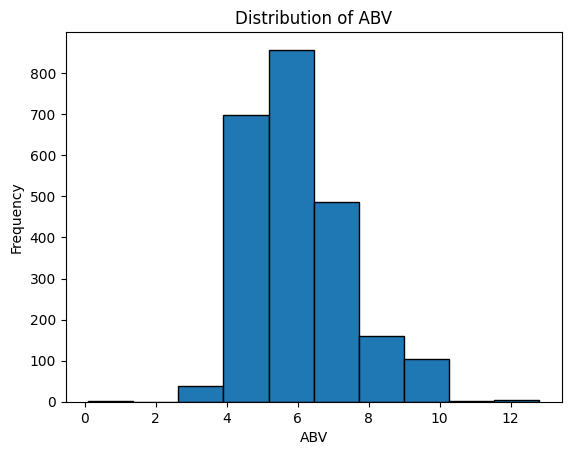

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['ABV'].astype(float), bins=10, edgecolor='black')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.title('Distribution of ABV')
plt.show()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [12]:
df['ABV'].isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [13]:
df.groupby('Location')['Beer'].count().reset_index().sort_values('Beer', ascending=False).head(10)

,Location,Beer
141,"Grand Rapids, MI",66
73,"Chicago, IL",55
293,"Portland, OR",52
166,"Indianapolis, IN",43
313,"San Diego, CA",42
47,"Boulder, CO",41
96,"Denver, CO",40
55,"Brooklyn, NY",38
320,"Seattle, WA",35
206,"Longmont, CO",33


## List all of the beer from Brooklyn, NY

In [14]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.90,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.70,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [15]:
Brooklyn_df = df[df['Location'] == 'Brooklyn, NY']
beer_counts = Brooklyn_df.groupby('Brewery').size().sort_values(ascending=False)
beer_counts.head(1)

Brewery
Sixpoint Craft Ales    24
dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [16]:
sixpoint_df = df[df['Brewery'] == 'Sixpoint Craft Ales']
sixpoint_df.groupby('Style').size().sort_values(ascending = False).head(5)

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [17]:
location_column = df['Location']
sep_df = location_column.str.split(', ', expand=True)
sep_df.head(10)
ny_df = sep_df[sep_df[1] == 'NY']

### Now *count* all of the breweries in New York state

In [18]:
len(ny_df)

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [19]:
df_cleaned = df.dropna(subset=['Style'])
ipa_df = df_cleaned[df_cleaned['Style'].str.contains('IPA', case=False)]
ipa_df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.70,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.20,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [20]:
df['IBUs'].value_counts.mean()

AttributeError: 'function' object has no attribute 'mean'

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [ ]:
df['IBUs'] = pd.to_numeric(df['IBUs'], errors='coerce')
average_IBU = df['IBUs'].mean()
average_IBU 

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['IBUs'].dropna(), bins=20)
plt.show()

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [ ]:
df[df['IBUs'] > 75.0]

## List all of the beers with IBUs below the 25th percentile

In [ ]:
df[df['IBUs'] < 25.0]

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [ ]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=False)

In [ ]:
plt.hist(df['IBUs'].dropna(), bins=20)
plt.show()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [ ]:
high_IBU_beers =df[df['IBUs'] > 75.0]
low_IBU_beers = df[df['IBUs'] < 25.0]
high_IBU_beers['Style'].value_counts().head(5).reset_index()

In [ ]:
low_IBU_beers['Style'].value_counts().head(5).reset_index()

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [ ]:
wheat_beers = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']
filtered_data = df[df['Style'].isin(wheat_beers)]['IBUs']

## Draw a histogram of the IBUs of those beers

In [ ]:
plt.hist(filtered_data, bins=25)
plt.title('Distribution of IBUs for Wheat Beers')
plt.xlabel('IBU')
plt.ylabel('Number of Beers')

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [ ]:
df[df['Style'].str.contains('IPA', case=False, na=False)]['IBUs'].mean()

In [ ]:
plt.hist(df[df['Style'].str.contains('IPA', case=False, na=False)]['IBUs'], bins=20)
plt.title('Distribution of IBUs for IPA Styles')
plt.xlabel('IBU')
plt.ylabel('Number of Beers')

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

In [ ]:
plt.hist(filtered_data, bins=20)

plt.hist(df[df['Style'].str.contains('IPA', case=False, na=False)]['IBUs'], bins=20)
plt.xlabel('IBU')
plt.ylabel('Number of Beers')


## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [22]:
df['ABV'] = pd.to_numeric(df['ABV'], errors='coerce')
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].mean()

5.043715846994536

In [35]:
IPA_df = df[df['Style'].str.contains('IPA', case=False, na=False)]


## Good work!

In [ ]:
df